# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** Karol Ożóg

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


[-6. 11. -6.  1.]
0.0
[ 2.43290201e+18 -8.75294804e+18  1.38037598e+19 -1.28709312e+19
  8.03781182e+18 -3.59997952e+18  1.20664780e+18 -3.11333643e+17
  6.30308121e+16 -1.01422999e+16  1.30753501e+15 -1.35585183e+14
  1.13102770e+13 -7.56111184e+11  4.01717716e+10 -1.67228082e+09
  5.33279460e+07 -1.25685000e+06  2.06150000e+04 -2.10000000e+02
  1.00000000e+00]


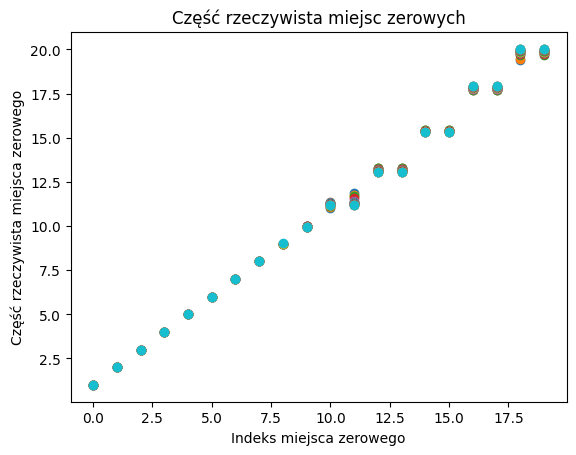

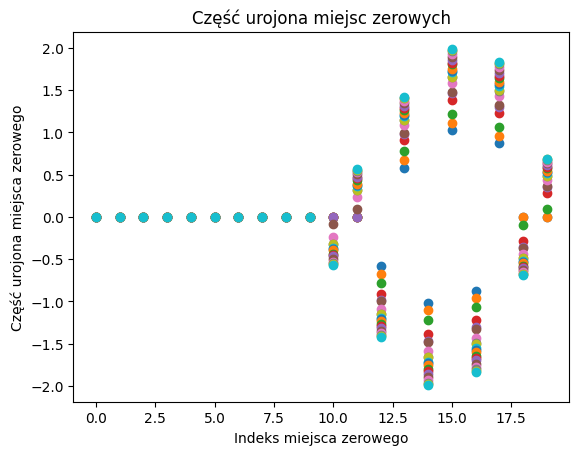

In [95]:
# ===== Twoja implementacja tutaj =====
r1=[1,2,3]
a1=nppoly.polyfromroots(r1)
print(a1)

f=0
for i in r1:
    f+=a1[0]*((i)**0)+a1[1]*((i)**1)+a1[2]*((i)**2)+a1[3]*((i)**3)

print(f)

def roots_20(coef: np.ndarray) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(coef, np.ndarray):
        return None
    if coef.ndim != 1:
        return None
    m=np.random.random_sample(len(coef))*1e-10
    coef+=m
    b=nppoly.polyroots(coef)
    return (coef,b)


a2=nppoly.polyfromroots([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
print(a2)
f1, ax1 = plt.subplots()
f2, ax2 = plt.subplots()
for i in range(20):
    (a2,x)=roots_20(a2)
    
    ax1.plot(np.real(x),'o')
    ax2.plot(np.imag(x),'o')

ax1.set_title('Część rzeczywista miejsc zerowych')
ax1.set_ylabel('Część rzeczywista miejsca zerowego')
ax1.set_xlabel('Indeks miejsca zerowego')
ax2.set_title('Część urojona miejsc zerowych')
ax2.set_ylabel('Część urojona miejsca zerowego')
ax2.set_xlabel('Indeks miejsca zerowego')

plt.show()



***Analiza i wnioski zad.1***

W zadaniu 1. najpierw sprawdzamy działanie funkcji *nppoly.polyfromroots()* wyznaczając wektor współczynników zadanego wielomianu w postaci kanonicznej. Uzyskane współczynniki zgadzają się ze wzorem analitycznym, ale dodatkowo sprawdzono zgodnie z poleceniem czy pierwiastki zerują wielomian.  Następnie zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja  dodatkowo lekko zaburza wejściowe współczynniki dodając wartość losową w okoliacahc 1e-10. W punkcie 3. wyznaczamy wektor współczynników wielomianu *w2* i w pętli "zaburzamy" te współczynniki coraz barzdiej. Na wykresach narysowano części rzeczywistei części urojone pierwiastków danego wielominau przy kolenych zaburzeniach. Z wykresów widać, że pierwiastki są stabilne do wartości 10. Następnie zaczynają się rozbiegać od oczkiewanych wartości i widizmy coraz większe różnice. Największe wahania wartości pierwiastki mają miejsce przy wartośćiach  15 i 16. Uwarunkowanie pierwiastka możnaby policzyć jako:
$$
cond=\frac{|\Delta r| / |r|}{\epsilon}
$$
gdzie r - piewiastek wielomianu, $\Delta r$ - pierwiastek zaburzonego wielomianu, $\epsilon$ - wielkośc zaburzenia współczynników.  


---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

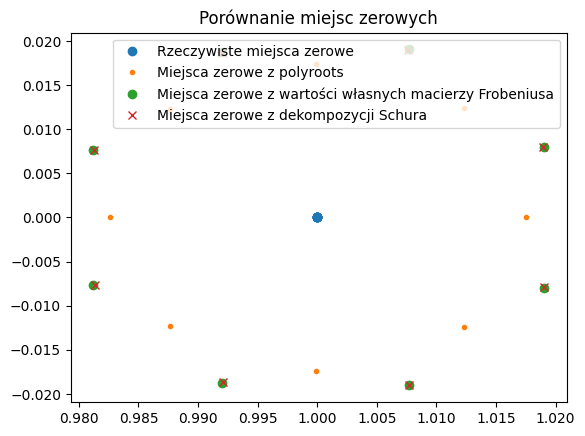

In [ ]:
# ===== Twoja implementacja tutaj =====
roots=[1,1,1,1,1,1,1,1]
a3=nppoly.polyfromroots(roots)

frob=main.frob_a(a3)

eig=np.linalg.eigvals(frob)

A, P = sp.linalg.schur(frob, output='complex')

eig2=np.diag(A)

roots3=nppoly.polyroots(a3)

fig, ax = plt.subplots()
ax.plot(np.real(roots),np.imag(roots),'o',label='Rzeczywiste miejsca zerowe')
ax.plot(np.real(roots3), np.imag(roots3), '.', label='Miejsca zerowe z polyroots')
ax.plot(np.real(eig), np.imag(eig), 'o', label='Miejsca zerowe z wartości własnych macierzy Frobeniusa')
ax.plot(np.real(eig2), np.imag(eig2), 'x', label='Miejsca zerowe z dekompozycji Schura')
ax.set_title('Porównanie miejsc zerowych')
ax.legend()
plt.show()

***Analiza i wnioski zad.2***

W tym zadaniu będziemy wyznaczać pierwiastki zadanego wielomianu na różne sposoby. Jako pierwsze implikujemy funkcję *frob_a* służącą do tworzenia macierzy frobeniusa którą potem będziemy wykorzystywać do wyznaczenia pierwiastków. Po sprawdzeniu poprawności danych tworzona jest zerowa macierz odpowiedniego rozmiaru, wpisywane są jedynki nad przekątną, a ostatni wiersz zastępowany jest zanegowanymi współczynnikami wielomianu podzielone przez ostatni współczynnik. Wartości własne macierzy Frobeniusa (a tym samym miejsca zerowe) z tego zadania  wyznaczamy wyjkorzystując funkcję *np.linalg.eigvals(frob)*. Jako drugi sposób wykorzystujemy rozkład Shura, który zwraca macierz A, która jest diagonalna i zawiera wartości własne, będące pierwiastkami wielomianu. Na koniec wyznaczamy także pierwiastki bezpośrednio przy użyciu funkcji *nppoly.polyroots()*. Pierwiastki otrzymane wszystkimi sposobami rysujemy na jednym wykresie. Wyznaczanie pierwiastków z wartości własnych macierzy Frobeniusa jest słabo uwarunkowane, mimo że analizowany wielomian ma wyłącznie rzeczywiste, wielokrotne pierwiastki, metody oparte na macierzy Frobeniusa generują jedynie rozwiązania zespolone. Z kolei polyroots daje wyniki znacznie bliższe wartościom analitycznym, tzn. dwa pierwiastki pozostają rzeczywiste, a pozostałe leżą bliżej jedynki i są obarczone mniejszym błędem.


---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

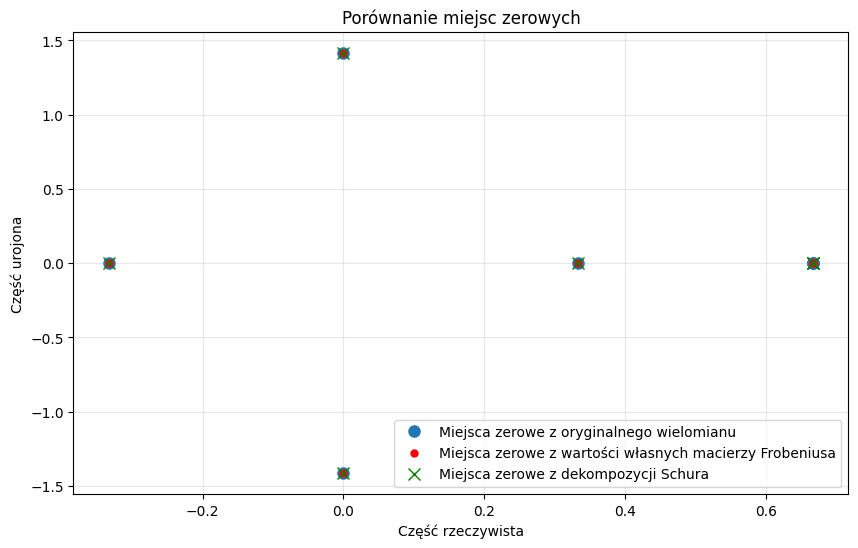

[ 5.55111512e-17+1.41421356e+00j  5.55111512e-17-1.41421356e+00j
 -3.33333333e-01+0.00000000e+00j  6.66671741e-01+0.00000000e+00j
  6.66664129e-01+4.39477169e-06j  6.66664129e-01-4.39477169e-06j
  3.33333333e-01+0.00000000e+00j]
(5.551115123125783e-17+1.4142135623730974j)
(5.551115123125783e-17-1.4142135623730974j)
(-0.3333333333333336+0j)
(0.6666717414552442+0j)
(0.6666641292723781+4.394771693229272e-06j)
(0.6666641292723781-4.394771693229272e-06j)
(0.3333333333333349+0j)
(1.5543122344752192e-15+1.4142135623730954j)
(1.3877787807814457e-15-1.4142135623730954j)
(-0.3333333333333335+4.2233475953613274e-17j)
(0.6666632745676558-5.5480442990900785e-06j)
(0.6666731673640878-1.6367989840619533e-07j)
(0.6666635580682617+5.711724197930486e-06j)
(0.3333333333333284+0j)
(-0.3333333333333335+0j)
(2.040034807748725e-15-1.4142135623730938j)
(2.040034807748725e-15+1.4142135623730938j)
(0.3333333333333333+0j)
(0.6666635691058749-5.365104365905031e-06j)
(0.6666635691058749+5.365104365905031e-06j)
(0.

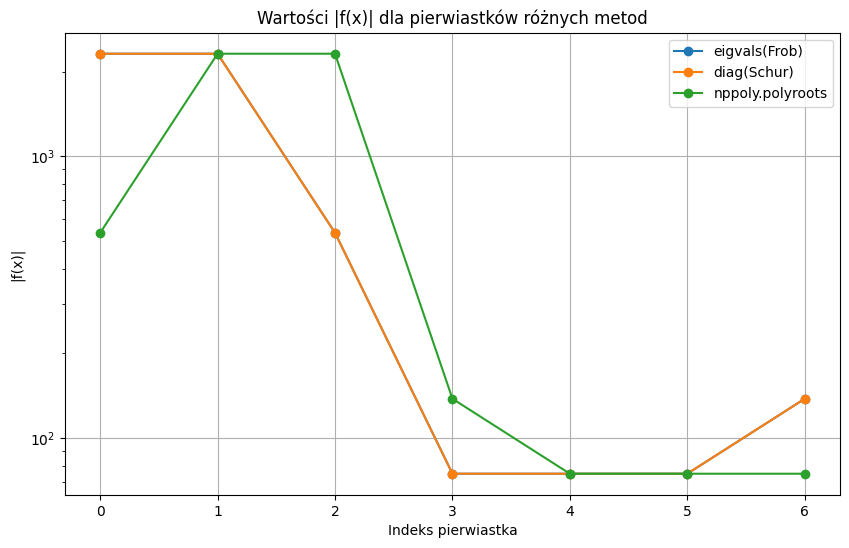


=Wartości wielomianu w znalezionych pierwiastkach=

Średnie |f(x)|:
  eigvals(Frob):    7.89e+02
  diag(Schur):      7.89e+02
  nppoly.polyroots: 7.89e+02

Maksymalne |f(x)|:
  eigvals(Frob):    2.31e+03
  diag(Schur):      2.31e+03
  nppoly.polyroots: 2.31e+03


In [ ]:
# ===== Twoja implementacja tutaj =====
coef=np.array([16,-72,-28,558,-990,783,-486,243])
frob=main.frob_a(coef)

eig=np.linalg.eigvals(frob)

A, P = sp.linalg.schur(frob, output='complex')
eig2=np.diag(A)
root3=nppoly.polyroots(coef)



f1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(np.real(root3), np.imag(root3), 'o', markersize=8, label='Miejsca zerowe z oryginalnego wielomianu')
ax1.plot(np.real(eig), np.imag(eig), 'r.', markersize=10, label='Miejsca zerowe z wartości własnych macierzy Frobeniusa')
ax1.plot(np.real(eig2), np.imag(eig2), 'gx', markersize=8, label='Miejsca zerowe z dekompozycji Schura')
ax1.set_title('Porównanie miejsc zerowych')
ax1.set_xlabel('Część rzeczywista')
ax1.set_ylabel('Część urojona')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.show()

print(eig)
def poly_value(x, coefficients):
    result = 0
    for i, coef in enumerate(coefficients):
        result += coef * (x ** (len(coefficients) - i - 1))
    return result


poly_vals_eig = [poly_value(root, coef) for root in eig]
poly_vals_eig2 = [poly_value(root, coef) for root in eig2] 
poly_vals_root3 = [poly_value(root, coef) for root in root3]


f2, ax2 = plt.subplots(figsize=(10, 6))
methods = ['eigvals(Frob)', 'diag(Schur)', 'nppoly.polyroots']
values = [np.abs(poly_vals_eig), np.abs(poly_vals_eig2), np.abs(poly_vals_root3)]

for i, (method, vals) in enumerate(zip(methods, values)):
    ax2.semilogy(range(len(vals)), vals, 'o-', label=method, markersize=6)

ax2.set_title('Wartości |f(x)| dla pierwiastków różnych metod')
ax2.set_xlabel('Indeks pierwiastka')
ax2.set_ylabel('|f(x)|')
ax2.legend()
ax2.grid()
plt.show()

print("\n=Wartości wielomianu w znalezionych pierwiastkach=\n")
print(f"Średnie |f(x)|:")
print(f"  eigvals(Frob):    {np.mean(np.abs(poly_vals_eig)):.2e}")
print(f"  diag(Schur):      {np.mean(np.abs(poly_vals_eig2)):.2e}")
print(f"  nppoly.polyroots: {np.mean(np.abs(poly_vals_root3)):.2e}")

print(f"\nMaksymalne |f(x)|:")
print(f"  eigvals(Frob):    {np.max(np.abs(poly_vals_eig)):.2e}")
print(f"  diag(Schur):      {np.max(np.abs(poly_vals_eig2)):.2e}")
print(f"  nppoly.polyroots: {np.max(np.abs(poly_vals_root3)):.2e}")



***Analiza i wnioski zad.3***

W trzecim zadaniu zastosowaliśmy tę samą metodę co wcześniej, analizując inny wielomian, którego współczynniki zostały podane. Na ich podstawie wywołaliśmy funkcję frob_a, a wyniki zwizualizowaliśmy na wykresie. Wszystkie trzy metody zwróciły praktycznie identyczne pierwiastki, co jest zaskakujące i trudno jednoznacznie wytłumaczyć, jednak może być związane z numeryczną stabilnością i uwarunkowaniem wielokrotnych pierwiastków. Przy obliczaniu wartości wielomianu w tych punktach obserwujemy znaczną rozbieżność od zera, co wskazuje na duży błąd numeryczny i słabe uwarunkowanie problemu — nawet przy zgodnych pierwiastkach wynik funkcji w tych punktach nie jest bliski zera.

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [80]:
# ===== Twoja implementacja tutaj =====
N=[10,20,30,]


for n in N:

    m=np.asarray([2 ** x for x in range(1, n+1)])

    A=np.diag(m)
    eig = np.linalg.eigvals(A)

    check = False
    while not check:
        P = np.diag(np.random.randint(0,100,(n)))
        check = main.is_nonsingular(P)
    
    B = P @ A @ np.linalg.inv(P)
    eig_B = np.linalg.eigvals(B)


    Q, R = np.linalg.qr(P)
    C = Q @ A @ np.linalg.inv(Q)
    eig_C = np.linalg.eigvals(C)


    Coef = nppoly.polyfromroots(m)
    frob = main.frob_a(Coef)
    eig_frob = np.linalg.eigvals(frob)

    max_error_A=max(np.abs(np.array(sorted(m)-np.array(sorted(eig)))))
    max_error_B=max(np.abs(np.array(sorted(m)-np.array(sorted(eig_B)))))
    max_error_C=max(np.abs(np.array(sorted(m)-np.array(sorted(eig_C)))))
    max_error_frob=max(np.abs(np.array(sorted(m)-np.array(sorted(eig_frob)))))

    mean_error_A=np.mean(np.abs(np.array(sorted(m)-np.array(sorted(eig)))))
    mean_error_B=np.mean(np.abs(np.array(sorted(m)-np.array(sorted(eig_B)))))
    mean_error_C=np.mean(np.abs(np.array(sorted(m)-np.array(sorted(eig_C)))))
    mean_error_frob=np.mean(np.abs(np.array(sorted(m)-np.array(sorted(eig_frob)))))
        
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A:<18.2e} {mean_error_A:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B:<18.2e} {mean_error_B:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C:<18.2e} {mean_error_C:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_frob:<18.2e} {mean_error_frob:<18.2e}\n")





   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   1.82e-12           3.37e-13          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   9.31e-10           3.10e-10          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    2.33e-10           7.76e-12          
   C_30 (Q*A*Q^T)     0.00e+00           

***Analiza i wnisoki zad.4***

Na początku tworzymy wektor zawierający kolejne potęgi liczby 2, który następnie używany jest do wygenerowania macierzy diagonalnej przy pomocy funkcji diag(). Ponieważ macierz jest diagonalna, jej wartości własne są dokładnie równe elementom na przekątnej, co pozwala sprawdzić poprawność dalszych obliczeń. Pierwszą metodą wyznaczania wartości własnych jest funkcja eigvals. Następnie tworzymy macierz $B_n$ jako przekształcenie $P_n A_n P_n^{-1}$, gdzie $𝑃_n$ jest macierzą diagonalną z losowych liczb w zakresie 0–100, reprezentujących wektory własne macierzy $A_b$. W celu odwrócenia macierzy P_n musimy najpier sprawdzić czy jest ona niosobliwa do czego wykorzystujemy funkcje testową *is_singualr*, jeżeli nie jest to generujemy ją ponownie do skutku. Porównujemy wartości własne macierzy $B_n$ z wartościami analitycznymi, uzyskanymi z przekątnej $A_n$. W analogiczny sposób tworzymt macierz $C_n$, z tym że macierz zostaje zastąpiona macierzą ortogonalną $Q$, uzyskaną w wyniku rozkładu QR. Na końcu tworzymy macierz Frobeniusa na podstawie wartości własnych oryginalnej macierzy i również porównujemy uzyskane dla niej wartości własne z wartościami analitycznymi. Całośc powtarzamy w pętli dla 3 różnych wymiarów macierzy. Zapisane w powyżsej tabeli wyniki pokazują, że cierze diagonalne i przekształcenia ortogonalne zachowują pełną dokładność, generując zerowe błędy nawet dla dużych rozmiarów. Wyniki dla pozostałych metod wskazują niewielkie błędy rzędu $10^{-10}$ dopiero przy 30 elementach, co wynika z kumulacji błędów zaokrągleń podczas odwracania macierzy i mnożeń. Problemem okazuje się macierz Frobeniusa, gdzie obserwujemy wykładniczy wzrost błędów od $10^{-12} dla n=10 aż do $10^{-6}$ dla n=30. Utrata dokładności może wynikać ze złego uwarunkowania macierzy, spowodowanego skrajnymi różnicami rzędów wielkości współczynników w ostatnim wierszu, co czyni tę metodę niepraktyczną dla problemów o dużych wymiarach.

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

***WNIOSKI***

Na laboratorium poznaliśmy metody numerycznego wyznaczania pierwiastków i współczynników wielomianów. Pokazaliśmy że wyznaczenie pierwiastków jest wrażliwe na zaburzenia współczynników, szczególnie w przypadku pierwiastków wielokrotnych lub blisko siebie położonych. Funkcja *polyroots()* daje wyniki bliższe wartościom analitycznym niż inne metody oparte na macierzy Frobeniusa, które mogą generować pierwiastki zespolone nawet dla wielomianów o rzeczywistych pierwiastkach. Macierze diagonalne i ich przekształcenia ortogonalne zachowują wysoką dokładność wartości własnych, natomiast macierz Frobeniusa jest źle uwarunkowana, co prowadzi do narastania błędów wraz ze wzrostem rozmiaru macierzy. Błędy numeryczne stają się szczególnie widoczne przy większych wymiarach macierzy lub przy wielokrotnych pierwiastkach, co wynika z kumulacji błędów zaokrągleń i złego uwarunkowania problemu.


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)